In [1]:
Testing = True # if True, only 116 time frames are shown in movie

# Imports

In [2]:
#-- import functions from my_functions.py file
import sys
sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')
from my_functions import *

import datetime as dt
import re
import cartopy.crs as ccrs
import matplotlib.cm as cm
import psutil
thismodule = sys.modules[__name__]

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


# Paths

In [3]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [4]:
#-- Correspondence table
df = pd.read_csv(os.path.join(DIR_DATA,'relation_2_table_UTC_dyamond_segmentation.csv'))
df.sort_values(by='UTC',ignore_index=True,inplace=True)
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Functions

In [15]:
def importData(i_t):
    
    # paths
    root_DYAMOND = df.iloc[i_t]['path_dyamond'] + '.%s.2D.nc'
    file_PW_DYAMOND = root_DYAMOND%'PW'
    file_Precac_DYAMOND = root_DYAMOND%'Precac'
    path_TOOCAN = '/'+df.iloc[i_t]['img_seg_path']

    # Check if file exists
    if os.path.exists(os.path.join(DIR_DYAMOND, file_Precac_DYAMOND)):
        # Load DYAMOND data
        Precac_DYAMOND = xr.open_dataarray(os.path.join(DIR_DYAMOND, file_Precac_DYAMOND))
        
        # Load TOOCAN data
        img_TOOCAN = xr.open_dataarray(path_TOOCAN)
    else:
        print("Here")
        # Increase i_t by 1
        i_t += 1
        # Recursive call with the updated i_t
        Precac_DYAMOND, img_TOOCAN = importData(i_t)
    return Precac_DYAMOND, img_TOOCAN


In [16]:
def getTimeStr(i_t):

    timestamp = df.path_dyamond[i_t].split('_')[-1]
    delta = dt.timedelta(seconds=int(int(timestamp)*7.5))
    date_t = dt.datetime(2016,8,1) + delta
    time_str = dt.datetime.strftime(date_t,"%h %d %Y, %H:%M")

    return time_str

In [17]:
def getCoords2D(dataset,slice_lon,slice_lat):
    
    # get correct coordinate names in dataset
    for prefix in 'lat','lon':
        r = re.compile("%s.*"%prefix)
        coord = list(filter(r.match,list(dataset.coords.dims)))[0]
        setattr(thismodule,'%s_coord'%prefix,coord)
    
    # extract coordinates
    lat_1D = dataset[lat_coord].sel({lat_coord:slice_lat})
    lon_1D = dataset[lon_coord].sel({lon_coord:slice_lon})

    # compute 2D meshgrid of coordinates
    lonarray,latarray = np.meshgrid(lon_1D,lat_1D)
    
    return lonarray,latarray

In [18]:
def showColorBar(fig,ax,im):
    
    x,y,w,h = ax.get_position().bounds
    dx = w/60
    cax = plt.axes([x+w+2*dx,y,dx,h])
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.set_ylabel('Surface Accum Precip (mm)')

In [19]:
def initFigure(i_t0,Lx_fig,Ly_fig,title=None,norm=None):
    # initialize figure
    fig = plt.figure(figsize=(Lx_fig,Ly_fig))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

    ims = []
    ## MY EDIT
    # ims = [[ax.imshow(np.zeros((Ly_fig, Lx_fig))), ax.imshow(np.zeros((Ly_fig, Lx_fig)))] for _ in range(2)]
    
    # for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):
    for slice_lon in [slice(lon_lim[0], lon_lim[1])]:

        #- background

        # coords
        lonarray_dyamond,latarray_dyamond = getCoords2D(Precac_DYAMOND,slice_lon,slice_lat)            
        # data
        Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
        # log scale
        Z = np.log(Z)

        # show
        im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=cmap)
        im.set_clim(*clim)

        #- MCSs
        
        # coords
        lonarray_toocan,latarray_toocan = getCoords2D(img_TOOCAN,slice_lon,slice_lat)            
        # data
        IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10    
        # show
        im_MCS = ax.pcolormesh(lonarray_toocan,latarray_toocan,IMG_SEG,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)

        # store image placeholders for later updating
        ims.append([im,im_MCS])

    # delete data and remove from memory
    # del Precac_DYAMOND
    # del img_TOOCAN
    del Z
    del IMG_SEG
    gc.collect()
    
    # cosmetics
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    showColorBar(fig,ax,im)
        
    # ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
    ax.coastlines('110m')
    ax.gridlines()
    
    return fig, ax, ims

In [20]:
def makeMovie(movie_path,j_start,j_end,Lx_fig,Ly_fig):
    
    Nt = len(df)
    
    # -- initialize figure
    
    # first time step
    i_t0 = j_row_t0
    print("i_t0:", i_t0)
    
    title_root = 'DYAMOND-Summer SAM-4km, %s'
    # t_str = "%3.2f"%PW_DYAMOND.time.data[0]
    t_str = getTimeStr(i_t0)
    title = title_root%t_str
    # title = ''
    
    # initialize
    fig, ax, ims = initFigure(i_t0,Lx_fig,Ly_fig,title=title)

    # remove margins~ish
    fig.subplots_adjust(left=0.02)
    
    # -- define movie loop
    
    def updateImage(i_t):

        
        # load data at i_t
        Precac_DYAMOND, img_TOOCAN = importData(i_t)
        
        t_str = getTimeStr(i_t)
        
        # for slice_lon,i_ims in zip([slice(lon_lim[0],360),slice(0,lon_lim[1])],list(np.arange(2))):
        for slice_lon,i_ims in zip([slice(lon_lim[0], lon_lim[1])],list(np.arange(2))):

            Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
            IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10
            
            lonarray_dyamond,latarray_dyamond = getCoords2D(Precac_DYAMOND,slice_lon,slice_lat)

            # update images
            # ims[i_ims][0].set_array(np.ravel(Z[:-1,:-1].data))
            ims[i_ims][0].set_array(np.ravel(Z.data))

            # ims[i_ims][1].set_array(np.ravel(IMG_SEG[:-1,:-1].data))
            ims[i_ims][1].set_array(np.ravel(IMG_SEG.data))



        
        ax.set_title(title_root%t_str)
        
        MB_used = psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2

        # delete data and remove from memory
        # del Precac_DYAMOND
        # del img_TOOCAN
        del Z
        del IMG_SEG
        gc.collect()
        
        return [ims]
    anim = animation.FuncAnimation(fig, updateImage,
                                   frames=range(j_start,j_end), interval=interval, blit=False)
    
    writer = animation.writers['ffmpeg'](fps=frame_rate)

    anim.save(movie_path,writer=writer,dpi=150)#,savefig_kwargs={'bbox_inches':'tight'})
    

# Settings

In [21]:
i_t_chosen = 5

In [22]:
## image
cmap = plt.cm.RdBu
# cmap_mcs = plt.cm.get_cmap('rainbow', 10)
cmap_mcs = plt.cm.get_cmap('Set3', 12)

clim = (0,70)

In [23]:
#-- Lon and Lat limits
lon_lim = (130,165)
lat_lim = (0,20)
slice_lat = slice(*lat_lim)

In [24]:
# load data
Precac_DYAMOND, img_TOOCAN = importData(i_t_chosen)

print(Precac_DYAMOND)
print(img_TOOCAN)


<xarray.DataArray 'Precac' (time: 1, lat: 518, lon: 896)>
[464128 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 0.01931 0.05794 0.09657 0.1352 ... 19.91 19.95 19.99
  * lon      (lon) float32 130.0 130.1 130.1 130.1 ... 164.9 164.9 164.9 165.0
  * time     (time) float32 214.2
Attributes:
    long_name:  Surface Accum Precip.
    units:      mm
<xarray.DataArray 'MCS_label' (time: 1, latitude: 2072, longitude: 9216)>
[19095552 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -40.0 -39.96 -39.92 ... 39.92 39.96 40.0
  * longitude  (longitude) float32 0.01953 0.05859 0.09766 ... 359.9 359.9 360.0
  * time       (time) datetime64[ns] 2016-08-01T03:30:00
Attributes:
    units:           
    standard_name:  MCS_label
    long_name:      MCS labellisation


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [25]:
print(getTimeStr(5))

Aug 01 2016, 04:00


*test*

In [26]:
slice_lon = slice(*lon_lim)
getCoords2D(Precac_DYAMOND, slice_lon,slice_lat)

(array([[130.01953, 130.05858, 130.09764, ..., 164.90233, 164.94139,
         164.98045],
        [130.01953, 130.05858, 130.09764, ..., 164.90233, 164.94139,
         164.98045],
        [130.01953, 130.05858, 130.09764, ..., 164.90233, 164.94139,
         164.98045],
        ...,
        [130.01953, 130.05858, 130.09764, ..., 164.90233, 164.94139,
         164.98045],
        [130.01953, 130.05858, 130.09764, ..., 164.90233, 164.94139,
         164.98045],
        [130.01953, 130.05858, 130.09764, ..., 164.90233, 164.94139,
         164.98045]], dtype=float32),
 array([[1.9314237e-02, 1.9314237e-02, 1.9314237e-02, ..., 1.9314237e-02,
         1.9314237e-02, 1.9314237e-02],
        [5.7942707e-02, 5.7942707e-02, 5.7942707e-02, ..., 5.7942707e-02,
         5.7942707e-02, 5.7942707e-02],
        [9.6571177e-02, 9.6571177e-02, 9.6571177e-02, ..., 9.6571177e-02,
         9.6571177e-02, 9.6571177e-02],
        ...,
        [1.9912977e+01, 1.9912977e+01, 1.9912977e+01, ..., 1.9912977e+01,
 

In [27]:
del slice_lon

*test*

# original:

In [28]:
## compute figure size
dlon = np.diff(lon_lim)[0] % 360
dlat = np.diff(lat_lim)[0]
Lx_fig = 15
Lx_cbar = 0
Ly_title = 0.5
Ly_fig = (Lx_fig-Lx_cbar)/dlon*dlat + Ly_title
print(Ly_fig)

9.071428571428571


# Mine:

In [29]:
dlon = np.diff(lon_lim)[0] % 360
dlat = np.diff(lat_lim)[0]
Lx_fig = int(dlon / 6)
Ly_fig = int(dlat / 6)

In [30]:
## time bounds
if Testing == True:
    i_start = 1800
else:
    i_start = 832
i_end = 1916

In [31]:
# Find first available index
t0_SAM = 200400
root_SAM_t0 = 'DYAMOND_9216x4608x74_7.5s_4km_4608_0000%d'%t0_SAM
j_row_t0 = df.index[df.path_dyamond == root_SAM_t0][0]
print('first available index:',j_row_t0)

if i_start < j_row_t0:
    err_str = "start index is too small (minimum is %d)"%j_row_t0
    raise ValueError(srr_str)

first available index: 832


In [32]:
# Find last available index
t1_SAM = 460800
root_SAM_t1 = 'DYAMOND_9216x4608x74_7.5s_4km_4608_0000%d'%t1_SAM
j_row_t1 = df.index[df.path_dyamond == root_SAM_t1][0]
print('last available index:',j_row_t1)

if i_end > j_row_t1:
    err_str = "end index is too large (maximum is %d)"%j_row_t1
    raise ValueError(err_str)

last available index: 1917


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


(<Figure size 360x216 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Surface Accum. Precip & MCS'}, xlabel='Longitude', ylabel='Latitude'>,
 [[<matplotlib.collections.QuadMesh at 0x15431937f8e0>,
   <matplotlib.collections.QuadMesh at 0x15431937fe20>]])

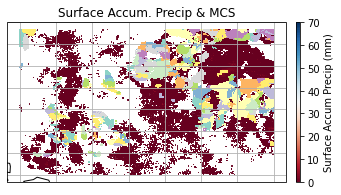

In [33]:
Precac_DYAMOND, img_TOOCAN = importData(i_t_chosen)
initFigure(i_t_chosen,Lx_fig,Ly_fig, title="Surface Accum. Precip & MCS")

i_t0: 832


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all val

Traceback (most recent call last):
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 251, in saving
    yield self
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 1157, in save
    anim._draw_next_frame(d, blit=False)
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 1193, in _draw_next_frame
    self._post_draw(framedata, blit)
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 1218, in _post_draw
    self._fig.canvas.draw_idle()
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2012, in draw_idle
    self.draw(*args, **kwargs)
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packag

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 251, in saving
    yield self
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 1157, in save
    anim._draw_next_frame(d, blit=False)
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 1193, in _draw_next_frame
    self._post_draw(framedata, blit)
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/animation.py", line 1218, in _post_draw
    self._fig.canvas.draw_idle()
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2012, in draw_idle
    self.draw(*args, **kwargs)
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packag

TypeError: object of type 'NoneType' has no len()

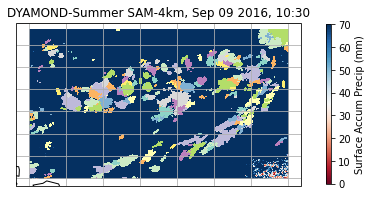

In [33]:
movie_path = "segmovietest2.mp4"
## animation
N_frames_per_day = 48
N_days_per_movie_second = 0.25
frame_rate = N_frames_per_day * N_days_per_movie_second
interval = int(1000/frame_rate)

makeMovie(movie_path,i_start,i_end,Lx_fig,Ly_fig)